## The laplace approximation


The laplace approximation therefore turns the integration task primarily into an optimisation task -- once you have the mode and curvature of the posterior, the integration is quick.




In [1]:
using Plots
using Distributions

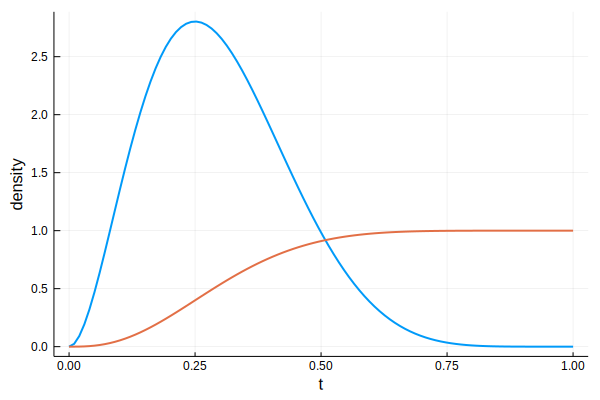

In [13]:
t = LinRange(0, 1,100)
p = Distributions.Beta(3,7)
plot(t, pdf.(p, t), lw=2, xlabel="t", ylabel="density", legend=false)
plot!(t, cdf.(p, t), lw=2, xlabel="t", ylabel="density", legend=false)

In [20]:
n = Normal(0, 1)
g = Gamma(2, 3)


MethodError: MethodError: no method matching *(::Normal{Float64}, ::Gamma{Float64})
Closest candidates are:
  *(::Any, ::Any, !Matched::Any, !Matched::Any...) at operators.jl:502

In [28]:
meshgrid(x, y) = (repeat(x, outer=length(y)), repeat(y, inner=length(x)))

meshgrid (generic function with 1 method)

In [39]:
gridd = meshgrid(LinRange(1, 5, 100), LinRange(1, 5, 100))

([1.0, 1.0404, 1.08081, 1.12121, 1.16162, 1.20202, 1.24242, 1.28283, 1.32323, 1.36364  …  4.63636, 4.67677, 4.71717, 4.75758, 4.79798, 4.83838, 4.87879, 4.91919, 4.9596, 5.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0  …  5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0])

In [40]:
gridd

([1.0, 1.0404, 1.08081, 1.12121, 1.16162, 1.20202, 1.24242, 1.28283, 1.32323, 1.36364  …  4.63636, 4.67677, 4.71717, 4.75758, 4.79798, 4.83838, 4.87879, 4.91919, 4.9596, 5.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0  …  5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0])

In [41]:
png = pdf.(n, gridd) * pdf.(g, gridd)

┌ Warning: `pdf(d::UnivariateDistribution, X::AbstractArray)` is deprecated, use `pdf.(d, X)` instead.
│   caller = _broadcast_getindex_evalf at broadcast.jl:574 [inlined]
└ @ Core ./broadcast.jl:574
┌ Warning: `pdf(d::UnivariateDistribution, X::AbstractArray)` is deprecated, use `pdf.(d, X)` instead.
│   caller = _broadcast_getindex_evalf at broadcast.jl:574 [inlined]
└ @ Core ./broadcast.jl:574
┌ Warning: `pdf(d::UnivariateDistribution, X::AbstractArray)` is deprecated, use `pdf.(d, X)` instead.
│   caller = _broadcast_getindex_evalf at broadcast.jl:574 [inlined]
└ @ Core ./broadcast.jl:574
┌ Warning: `pdf(d::UnivariateDistribution, X::AbstractArray)` is deprecated, use `pdf.(d, X)` instead.
│   caller = _broadcast_getindex_evalf at broadcast.jl:574 [inlined]
└ @ Core ./broadcast.jl:574


MethodError: MethodError: no method matching *(::Tuple{Array{Float64,1},Array{Float64,1}}, ::Tuple{Array{Float64,1},Array{Float64,1}})
Closest candidates are:
  *(::Any, ::Any, !Matched::Any, !Matched::Any...) at operators.jl:502

In [44]:
 pdf.(n, gridd) * pdf.(g, gridd)

MethodError: MethodError: no method matching *(::Tuple{Array{Float64,1},Array{Float64,1}}, ::Tuple{Array{Float64,1},Array{Float64,1}})
Closest candidates are:
  *(::Any, ::Any, !Matched::Any, !Matched::Any...) at operators.jl:502

In [15]:
x₀= mode(p)
σ = std(p)

0.13816985594155148

In [18]:
laplace(x, mode, sigma) = sigma

laplace (generic function with 1 method)

Of course generally we're not going to have nice analytic expressions for real problems where a Laplace approximation might be needed.
--> autodiff etc

In [31]:
quantile.(p, t)

100-element Array{Float64,1}:
 0.0                 
 0.053543344524692234
 0.06910196707533311 
 0.08051885781605697 
 0.08993604202742109 
 0.09813460410449742 
 0.10549949174556657 
 0.11225261317242197 
 0.11853511198199193 
 0.12444308630639796 
 0.13004532995284124 
 0.13539302871903572 
 0.14052545506170017 
 ⋮                   
 0.4800311708197894  
 0.4891352960803207  
 0.49892240046372227 
 0.5095383186745883  
 0.5211831709184991  
 0.5341430770521625  
 0.5488495847882219  
 0.5660027210595144  
 0.5868642745573024  
 0.6141263607212257  
 0.6557521754983626  
 1.0                 